In [102]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly
import plotly.graph_objects as go
import plotly.express as px
import math
import arch

from datetime import datetime

In [103]:
data_folder = "data/"
!ls $data_folder

asset_details.csv             supplemental_train.csv
example_sample_submission.csv train.csv
example_test.csv


In [104]:
crypto_df = pd.read_csv(data_folder + 'train.csv')

In [105]:
pd.to_datetime(crypto_df['timestamp'], unit='s')
crypto_df.index = crypto_df['timestamp']

In [106]:
crypto_df.describe()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
count,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423680e+07,2.348647e+07
mean,1.577120e+09,6.292544e+00,2.864593e+02,1.432640e+03,1.436350e+03,1.429568e+03,1.432640e+03,2.868530e+05,NaN,7.121752e-06
std,3.323350e+07,4.091861e+00,8.673982e+02,6.029605e+03,6.039482e+03,6.020261e+03,6.029611e+03,2.433935e+06,NaN,5.679042e-03
min,1.514765e+09,0.000000e+00,1.000000e+00,1.170400e-03,1.195000e-03,2.000000e-04,1.171400e-03,-3.662812e-01,-inf,-5.093509e-01
25%,1.549011e+09,3.000000e+00,1.900000e+01,2.676500e-01,2.681600e-01,2.669000e-01,2.676483e-01,1.410725e+02,2.676368e-01,-1.694354e-03
50%,1.578372e+09,6.000000e+00,6.400000e+01,1.428860e+01,1.431250e+01,1.426300e+01,1.428920e+01,1.295415e+03,1.428769e+01,-4.289844e-05
75%,1.606198e+09,9.000000e+00,2.210000e+02,2.288743e+02,2.293000e+02,2.284200e+02,2.288729e+02,2.729764e+04,2.288728e+02,1.601520e-03
max,1.632182e+09,1.300000e+01,1.650160e+05,6.480594e+04,6.490000e+04,6.467053e+04,6.480854e+04,7.597554e+08,inf,9.641699e-01


In [107]:
crypto_df.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,,
1514764860,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1514764860,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
1514764860,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
1514764860,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
1514764860,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
1514764860,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
1514764860,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
1514764860,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,NaN
1514764920,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079


In [108]:
asset_details = pd.read_csv(data_folder + 'asset_details.csv')
asset_details

,,<<<<<<< HEAD
Asset_ID,Weight,Asset_Name
2,2.3978952727983707,Bitcoin Cash
0,4.30406509320417,Binance Coin
1,6.779921907472252,Bitcoin
5,1.3862943611198906,EOS.IO
7,2.0794415416798357,Ethereum Classic
6,5.8944028342648505,Ethereum
9,2.3978952727983707,Litecoin
11,1.6094379124341003,Monero
13,1.791759469228055,TRON


/Users/shreyasingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Asset_ID', ylabel='count'>

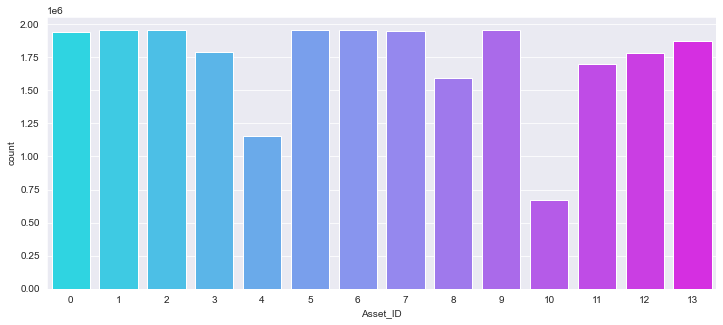

In [109]:
plt.figure(figsize=(12,5))
sns.countplot(crypto_df['Asset_ID'], palette='cool')

In [110]:
btc = crypto_df[crypto_df['Asset_ID'] == 1].set_index("timestamp")
btc_range = btc.iloc[-500:]  # Since we cannot plot the entire btc, so selecting the latest 500 points.
btc_range.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1632152460,1,1747.0,43795.582857,43812.350001,43757.74,43788.523087,57.418939,43779.265159,-0.000782
1632152520,1,2004.0,43789.091429,43856.000000,43774.50,43795.514286,70.487479,43805.173544,-0.000468
1632152580,1,1792.0,43788.650000,43868.000000,43754.55,43844.012857,63.508808,43804.801217,-0.000810
1632152640,1,1822.0,43841.212857,43868.000000,43759.70,43776.195714,66.363434,43795.941803,-0.000596
1632152700,1,1741.0,43773.905714,43851.000000,43742.91,43825.920000,50.774907,43790.736873,-0.001321


In [111]:
fig = go.Figure(data=[go.Candlestick(x=btc_range.index, 
                                     open=btc_range['Open'], 
                                     high=btc_range['High'], 
                                     low=btc_range['Low'], 
                                     close=btc_range['Close'])])
print('Use the slider to Adjust and Zoom')
fig.show()

Use the slider to Adjust and Zoom


In [112]:
eth = crypto_df[crypto_df['Asset_ID'] == 6].set_index("timestamp")
eth_range = eth.iloc[-500:]  # Since we cannot plot the entire eth, so selecting the latest 500 points.

fig = go.Figure(data=[go.Candlestick(x=eth_range.index, 
                                     open=eth_range['Open'], 
                                     high=eth_range['High'], 
                                     low=eth_range['Low'], 
                                     close=eth_range['Close'])])
fig.show()

In [113]:
crypto_df.isnull().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

In [114]:
btc.isnull().sum()

Asset_ID      0
Count         0
Open          0
High          0
Low           0
Close         0
Volume        0
VWAP          0
Target      304
dtype: int64

In [115]:
#data preprocessing
#filling the gaps in time series
btc = btc.reindex(range(btc.index[0],btc.index[-1]+60,60),method='pad')
eth = eth.reindex(range(eth.index[0],eth.index[-1]+60,60),method='pad')

In [116]:
btc.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643
1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037
1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309
1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999
1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079


In [117]:
btc.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643
1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037
1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309
1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999
1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079


In [118]:
btc['Return'] = 100 * (btc['Close'].pct_change())

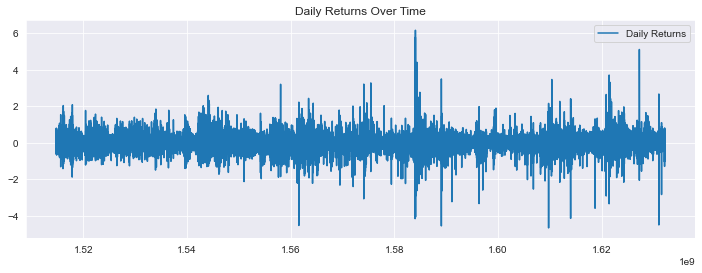

In [119]:
btc.dropna(inplace=True)

fig = plt.figure()
fig.set_figwidth(12)
plt.plot(btc['Return'], label = 'Daily Returns')
plt.legend(loc='upper right')
plt.title('Daily Returns Over Time')
plt.show()

In [120]:
daily_volatility = btc['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

monthly_volatility = math.sqrt(21) * daily_volatility
print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

annual_volatility = math.sqrt(252) * daily_volatility
print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

Daily volatility:  0.12%
Monthly volatility:  0.56%
Annual volatility:  1.94%


/Users/shreyasingh/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01492. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.


/Users/shreyasingh/opt/anaconda3/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning:


The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.


/Users/shreyasingh/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning:

y is poorly scaled, which may affect 

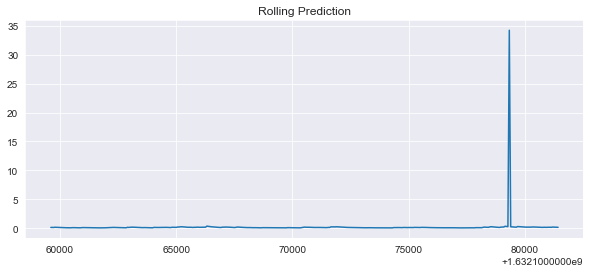

In [121]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = btc['Return'][:-(test_size-i)]
    model = arch.arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=btc['Return'].index[-365:])

plt.figure(figsize=(10,4))
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')
plt.show()

In [122]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:            2.10167e+06
Distribution:                  Normal   AIC:                      -4.20334e+06
Method:            Maximum Likelihood   BIC:                      -4.20329e+06
                                        No. Observations:              1956021
Date:                Sat, Dec 11 2021   Df Residuals:                  1956020
Time:                        13:24:21   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         3.5191e-04  8.210e-05      4.286  1.815e-05 [1.910e-04,5.128e-04]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.9845e-04  4.148e-04      0.720      0.472 [-5.145e-04,1.111e-03]
alpha[1]       0.2000      0.106      1.896  5.801e-02   [-6.787e-03,  0.407]
beta[1]        0.7800      0.151      5.172  2.322e-07      [  0.484,  1.076]
=============================================================================

Covariance estimator: robust
"""

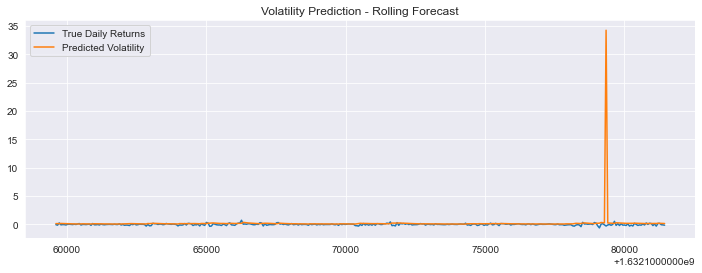

In [123]:

plt.figure(figsize=(12,4))
plt.plot(btc['Return'][-365:])
plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])
plt.show()

In [124]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [125]:
mean_squared_error(rolling_predictions, btc['Return'][-365:])

3.3080612776551095

In [126]:
from scipy.stats import pearsonr
corr, _ = pearsonr(rolling_predictions, btc['Return'][-365:])

In [127]:
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.105
